In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(42)

In [2]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

x_b = np.c_[np.ones((100, 1)), x]

x_test = np.array([[0], [2]])
x_b_test = np.c_[np.ones((2, 1)), x_test]

Batch Gradient Descent

In [3]:
num_iters = 1000
batch_size = len(x)
learning_rate = 0.1
w = np.random.randn(2, 1)

for _ in range(num_iters):
    gradients = 2.0 / batch_size * x_b.T.dot(x_b.dot(w) - y)
    w = w - learning_rate * gradients
    
print("w = {}".format(w))

y_hat_test = x_b_test.dot(w)
print("y_hat_test = {}".format(y_hat_test))

w = [[4.21509616]
 [2.77011339]]
y_hat_test = [[4.21509616]
 [9.75532293]]


In [4]:
def plot_model(w):
    x_test = np.array([[0], [2]])
    x_b_test = np.c_[np.ones((2, 1)), x_test]
    y_hat = x_b_test.dot(w)
    
    plt.figure()
    plt.plot(x, y, '.')
    plt.plot(x_test, y_hat_test)
    plt.show()

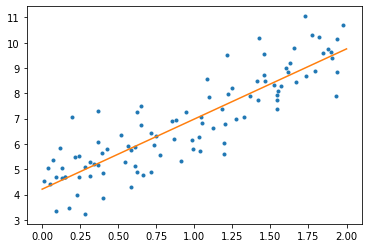

In [5]:
plot_model(w)

Stochastic Gradient Descent

Manual

In [6]:
num_epochs = 50
m = len(x)
w = np.random.randn(2, 1)

for epoch in range(num_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - 0.01 * gradients
        
print("w = {}".format(w))

w = [[4.1190865]
 [2.6599911]]


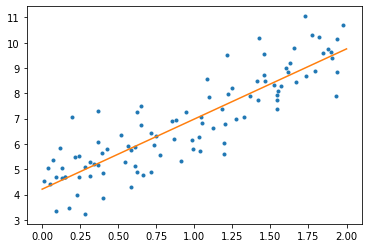

In [7]:
plot_model(w)

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [9]:
w = [sgd_reg.intercept_[0], sgd_reg.coef_[0]]
print("w = {}".format(w))
# plot_model(w)

w = [4.167820891514644, 2.726030517839993]


Mini-batch Gradient Descent

In [10]:
num_epochs = 50
batch_size = 20
m = len(x)
w = np.random.randn(2, 1)

for epoch in range(num_epochs):
    shuffled_indices = np.random.permutation(m)
    x_b_shuffled = x_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = x_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradients = 2.0 / batch_size * xi.T.dot(xi.dot(w) - yi)
        w = w - 0.1 * gradients
        
print("w = {}".format(w))

w = [[4.21614125]
 [2.77501029]]


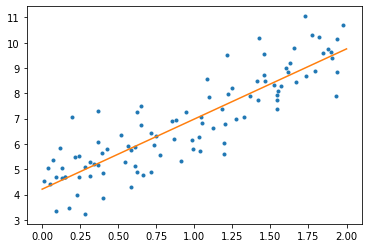

In [11]:
plot_model(w)